# DS 3000 - Assignment [TODO: enter assignment number]

**Student Name**: Evelyn Yaskin

**Date**: 2/9/24


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

TODO: Copy/Paste the instructions for this question.


1. (0 pts) Load the data directly from the url into a dataframe. 

In [50]:
import pandas as pd

data = pd.read_csv('Substance_Use_Disorder_Treatment_Program_Admissions__Beginning_2007.csv')

2. (5 pts) Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed) and perform at least one additional data preparation step.

In [182]:
data['County of Program Location'] = data['County of Program Location'].astype('string')
data['Program Category'] = data['Program Category'].astype('string')
data['Service Type'] = data['Service Type'].astype('string')
data['Age Group'] = data['Age Group'].astype('string')
data['Primary Substance Group'] = data['Primary Substance Group'].astype('string')

duplicates = data[data.duplicated()]
print("Number of duplicated rows:", len(duplicates))

Number of duplicated rows: 0


With this data frame, 
I converted all "object" columns to strings, so that the data
could be read and visualized.
I also make sure there were no duplicates in the code, 
by using the duplicated function, and making sure nothing was printed out. 

3) (10 pts) Visualize the distribution of Age Groups, Program Category, Primary Substance Group, and Admissions. 
Ensure that you choose an appropriate graph based on the type of data. Explain each chart.

FYI: These graphs all represent distributions of data within 
the state of New York treatment programs, throughout the years 
2007 - 2021. 

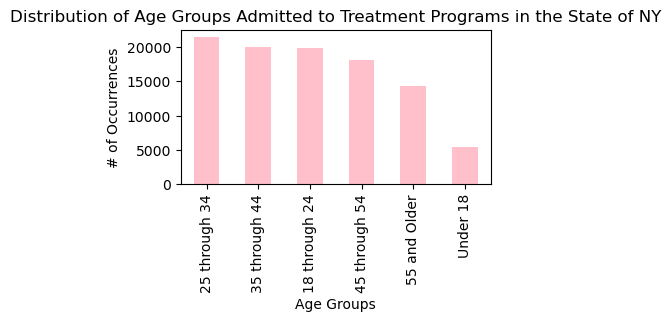

In [224]:
import pandas as pd
import matplotlib.pyplot as plt

# Distribution of Age Groups
age_group_data = data['Age Group'].value_counts()

# 1) Visualize the distribution of age groups
plt.figure(figsize=(4,2))
age_group_data.plot(kind='bar', color='pink')
plt.title('Distribution of Age Groups Admitted to Treatment Programs in the State of NY')
plt.xlabel('Age Groups')
plt.ylabel('# of Occurrences')
plt.show()

This graph shows the distribution of age groups within the data, and how many outputs are within each group. The x-axis represents the age groups (at the time of admission to the treatment program), for example, "under 18", and the y-axis represents the number of people that exist within that age group. We can see from the graph that the age group with the highest number of occurences is from 25 to 34 years, with under 18 being the smallest group. Overall, the data frame is pretty evenly spread out amongst age groups, with under 18 being a bit of an exception, since it's a smaller group. This graph covers data from the years of 2007-2021. 

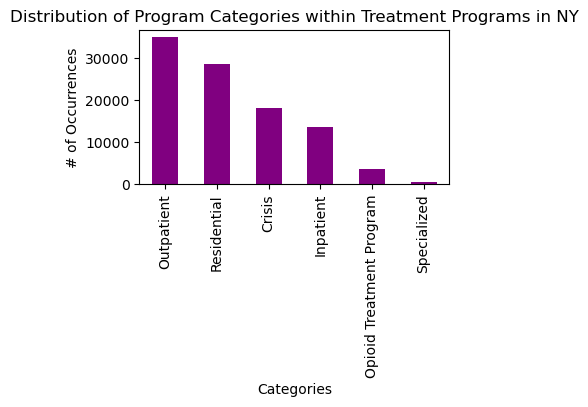

In [225]:
# 2) Distribution of Program Categories
distribution_categories = data['Program Category'].value_counts()
plt.figure(figsize=(4,2))
distribution_categories.plot(kind='bar', color='purple')
plt.title('Distribution of Program Categories within Treatment Programs in NY')
plt.xlabel('Categories')
plt.ylabel('# of Occurrences')
plt.show()

This graph visualizes the distribution of different program categories that exist within the treatment programs in NY. The x-axis is broken into the different categories, including crisis, inpatient, opiod, treatment program, residential, outpatient, and specialized. The y-axis represents the number of occurences for each category. From the graph, we can see that the outpatient category has the most admissions, and specialized with the least. 

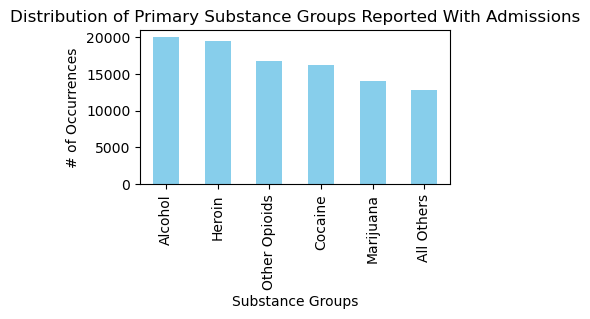

In [226]:
# 3) Distribution of Primary Substance Groups
distribution_substance_groups = data['Primary Substance Group'].value_counts()
plt.figure(figsize=(4,2))
distribution_substance_groups.plot(kind='bar', color='skyblue')
plt.title('Distribution of Primary Substance Groups Reported With Admissions')
plt.xlabel('Substance Groups')
plt.ylabel('# of Occurrences')
plt.show()

This graph visualizes the distribution of primary substances of misuse at at the time of admissions to a program. Multiple substances are combined into similar groups. As we can see from the graph, alcohol and heroin were amongst the most misused substances upon admissions, and all other substances were the least. 

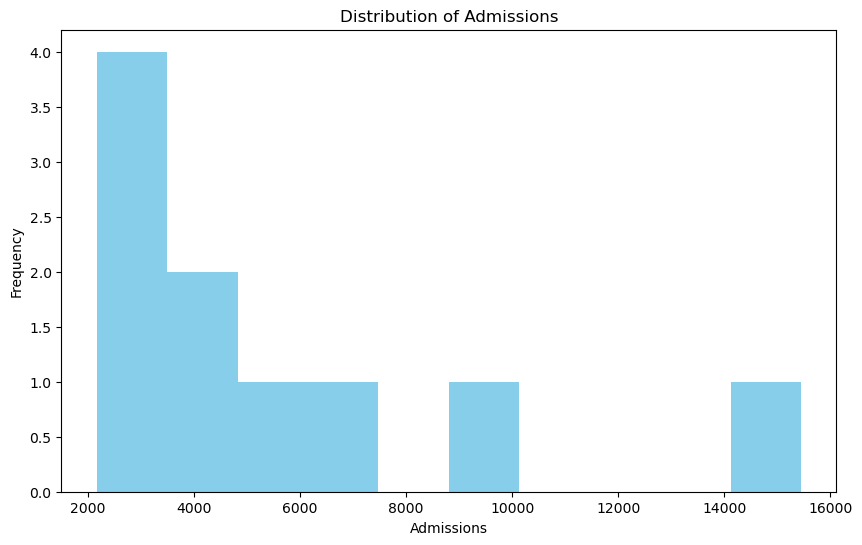

In [228]:
# 4) Visualize the distribution of admissions
admissions_distribution = data['Admissions'].value_counts().sort_index().head(10)
plt.figure(figsize=(10, 6))
admissions_distribution.plot(kind='hist', color='skyblue', bins=10)
plt.title('Distribution of Admissions')
plt.xlabel('Admissions')
plt.ylabel('Frequency')
plt.show()

This graph visualizes the total count of admissions over the years. Unlike the other graphs, where it compares admissions to a different column, this one focuses on the frequency of admissions. From the graph we can see that 2000 - 3000 admissions had the most frequency, meaning that was the amount of admissions that most frequently showed up over the years, whereas admissions of 5000 - 7000, 9000 - 10000, and around 140000 - 150000 were least frequently shown. I used a histogram for this specific one, so that I could compare frequencies over time, instead of comparison of columns.

4) Create a function called annualAdmissions() that calculates the 
total number of reported admissions that transpired each year, 
for the entire state of NY and display the results using a line chart. 
Annotate the chart to show the year with the highest number of admissions.

In [239]:
def annualAdmissions(data):
    admissions_by_year = data.groupby('Year')['Admissions'].sum()
    max_year = admissions_by_year.idxmax()
    max_admissions_by_year = admissions_by_year.max()
    
    plt.figure(figsize=(10, 6))
    plt.plot(admissions_by_year, marker='*', color='skyblue')

    plt.annotate(f'Max Admissions: {max_admissions_by_year}',
                 xy=(max_year, max_admissions_by_year),
                 xytext=(-50, 20),
                 textcoords='offset points',
                 arrowprops=dict(facecolor='red', arrowstyle='->'),
                )

    plt.title('Annual Admissions in New York State')
    plt.xlabel('Year')
    plt.ylabel('Total Admissions')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

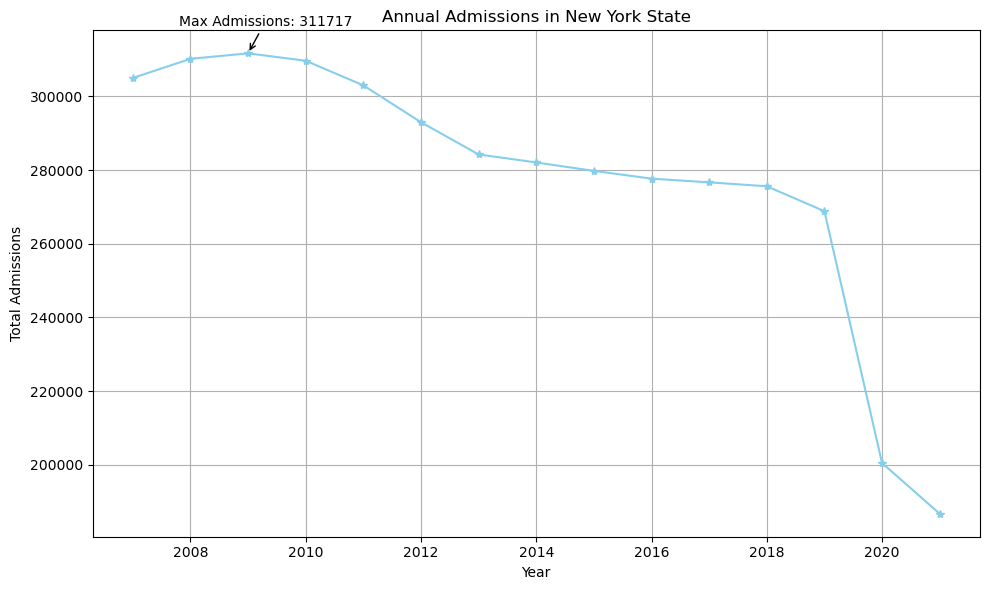

In [240]:
annualAdmissions(data)

This chart represents the numbers of admissions to treatment programs
in the state of New York over the years.
From years 2008 - 2011 the number of admissions is pretty steady.
It then starts to decrease at a steady pace, until the year 2019 
where it suddenly drops significantly. It's possible that in 2019, 
New York implemented a different preventative process, or 
that the admissions just dropped naturally. 

5: (10 pts) Create a function called annualAdmissionsByCounty(year).
The function should take the year as input, filter the data to find 
all admissions for that year and calculate the proportion of 
admissions grouped by county. 
For example, if the year is 2007, the function should calculate the 
admissions as follows: county A 75%, county B 20% and county C 2.5%,
etc. Display a bar chart with the top 10 counties. 
Using a new cell, visualize the annualAdmissionsByCounty() 
for the last 10 years. What are the patterns that you have observed?

In [165]:
def annualAdmissionsByCounty(year):
    year_data = data[data['Year'] == year]
    
    county_proportions = year_data.groupby('County of Program Location')['Admissions'].sum() / year_data['Admissions'].sum()
    
    county_proportions = county_proportions.sort_values(ascending=False)
    
    top_10_counties = county_proportions.head(10)
    
    plt.figure(figsize=(8, 6))
    top_10_counties.plot(kind='bar', color='skyblue')
    plt.title(f'Proportions of Admissions by County in {year}')
    plt.xlabel('Counties')
    plt.ylabel('Proportion of Admissions')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    return top_10_counties

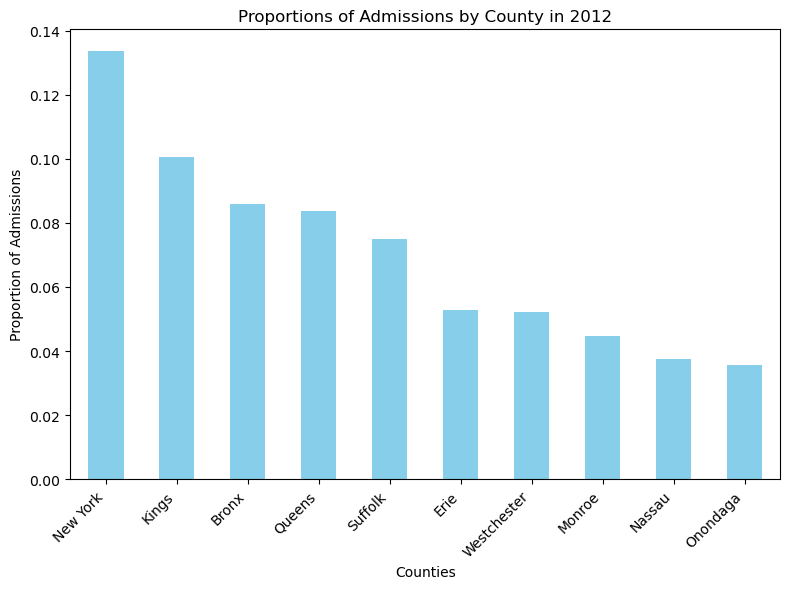

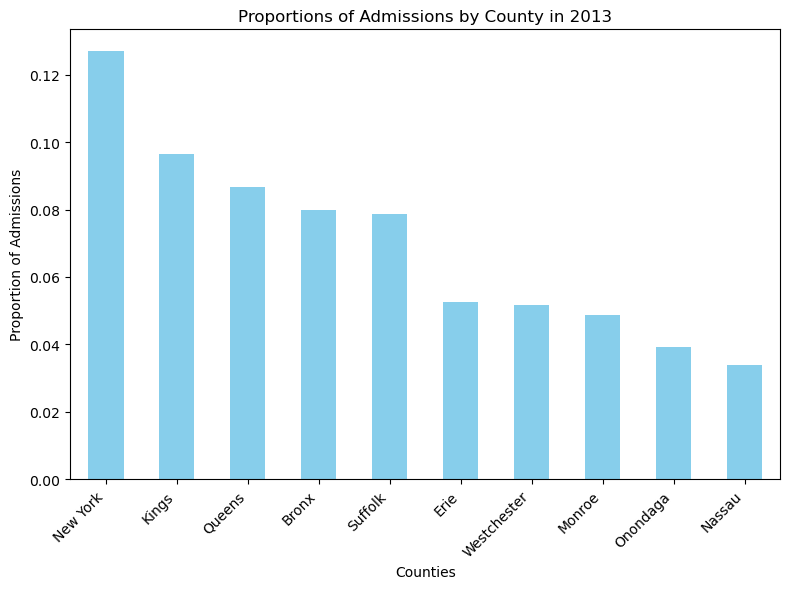

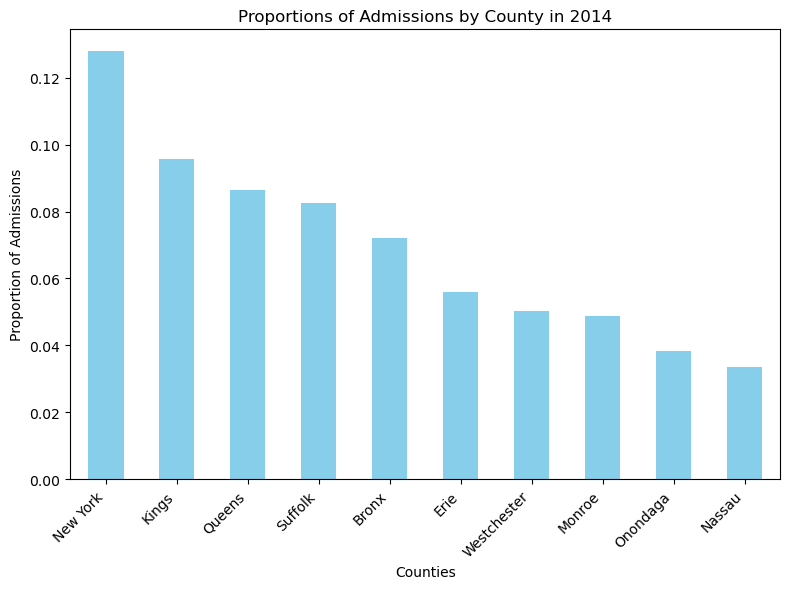

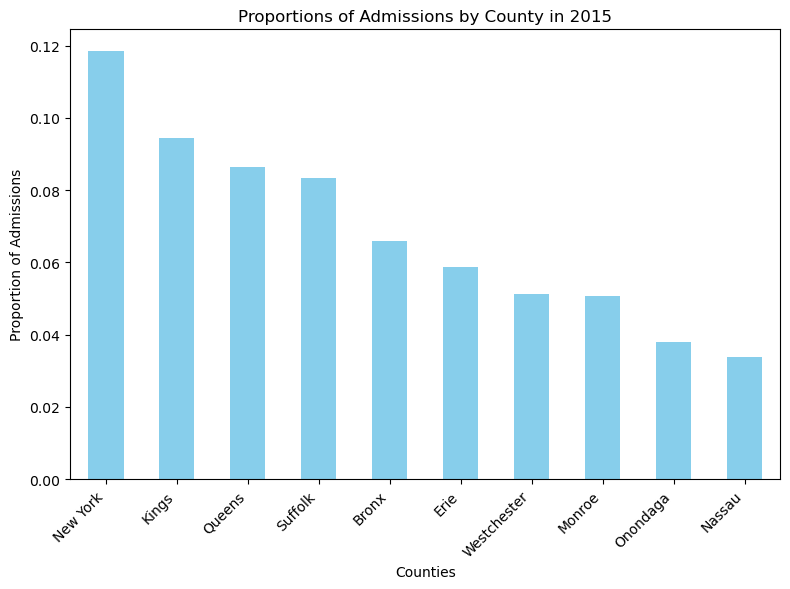

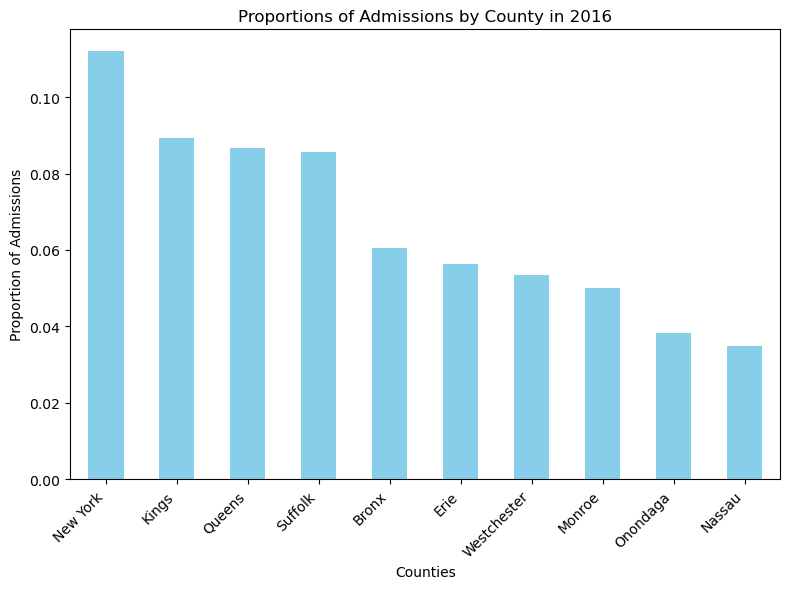

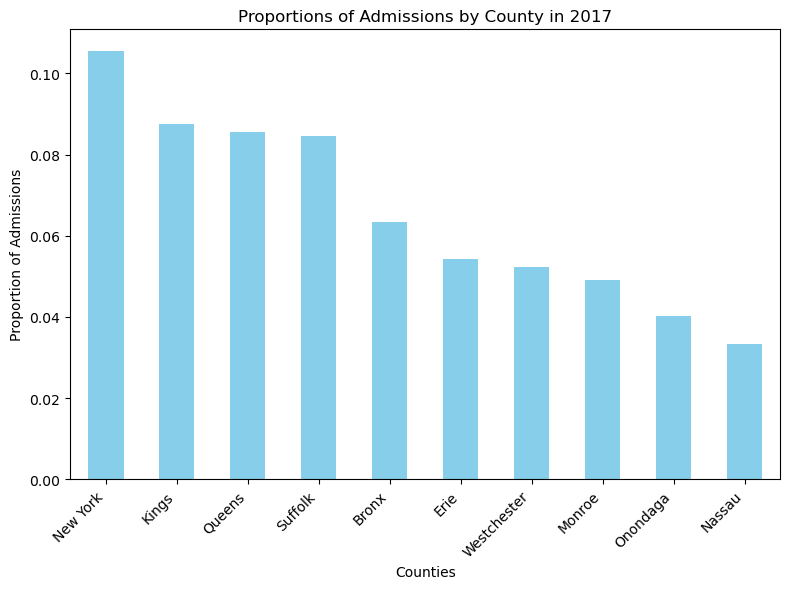

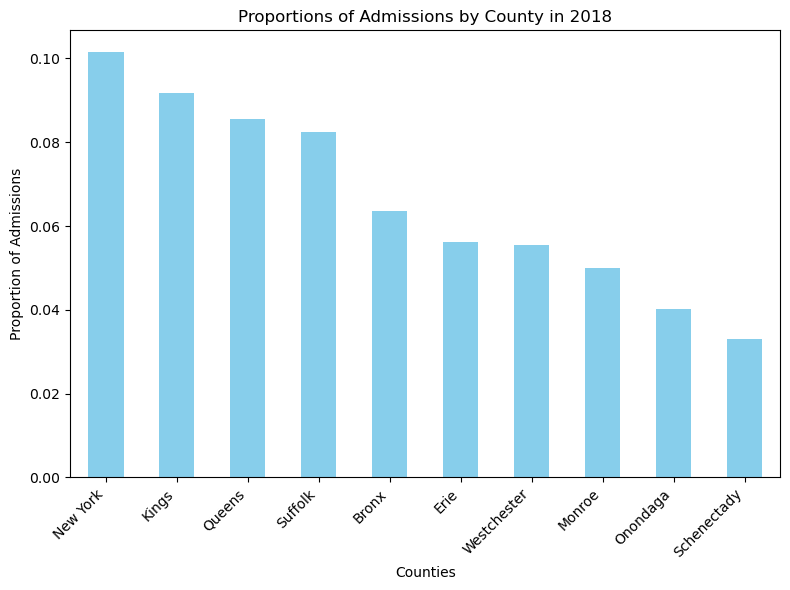

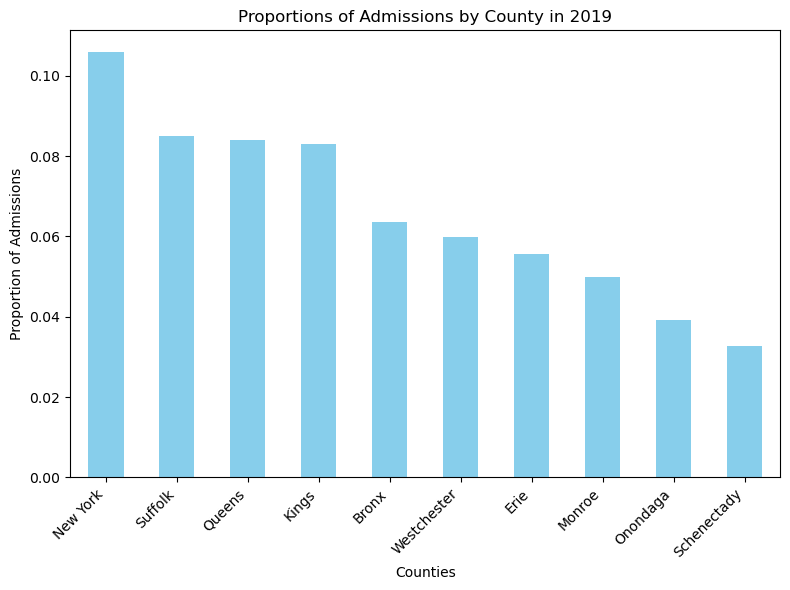

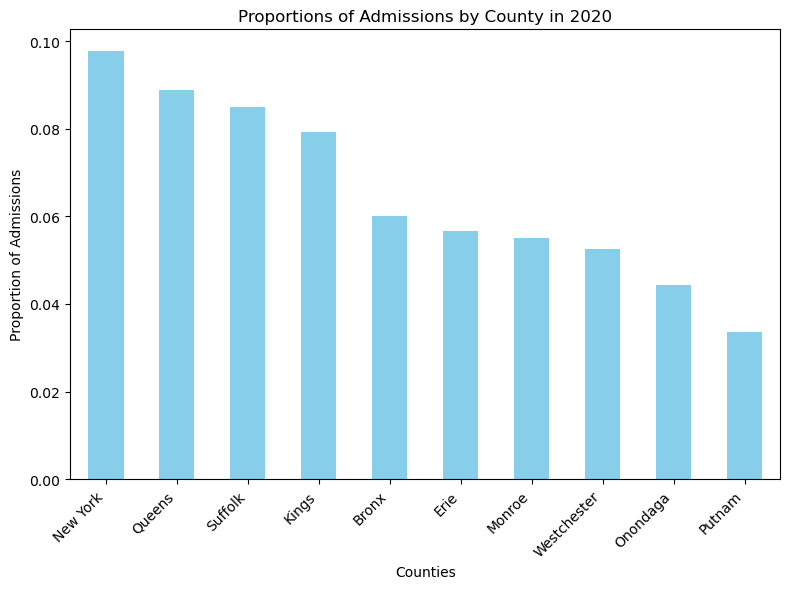

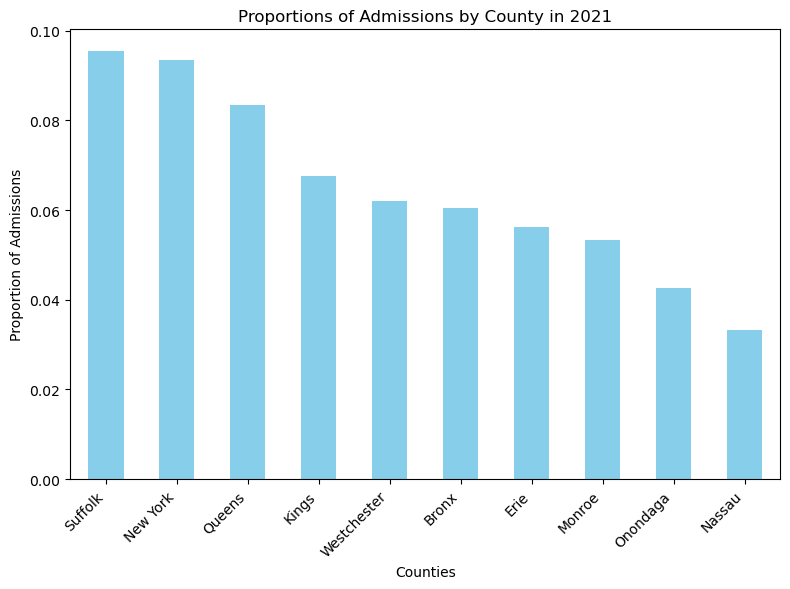

In [166]:
for year in range(2012, 2022):
    top_10_counties = annualAdmissionsByCounty(year)
    

Some patterns that I noticed were that for most years, New York, Kings,  Queens, and Suffolk, switched between the highest proportionates of admissions. I also noticed that Nassau only showed up in the top proportions in the years of 2021, 2017, 2016, 2015, 2014, 2013, 2012, but not the other 3 years. And finally I noticed that Erie for the majority of the years remained in its same position over the years. 

6: (10 pts) Filter the data, and extract all admissions to the various
“Rehab” facilities; i.e. you should perform a case-insensitive match 
for all facilities that include the word rehab, rehabilitation, etc.
Using the filtered data, identify which substance is the most 
prominent among each age group. Visualize and explain the results.

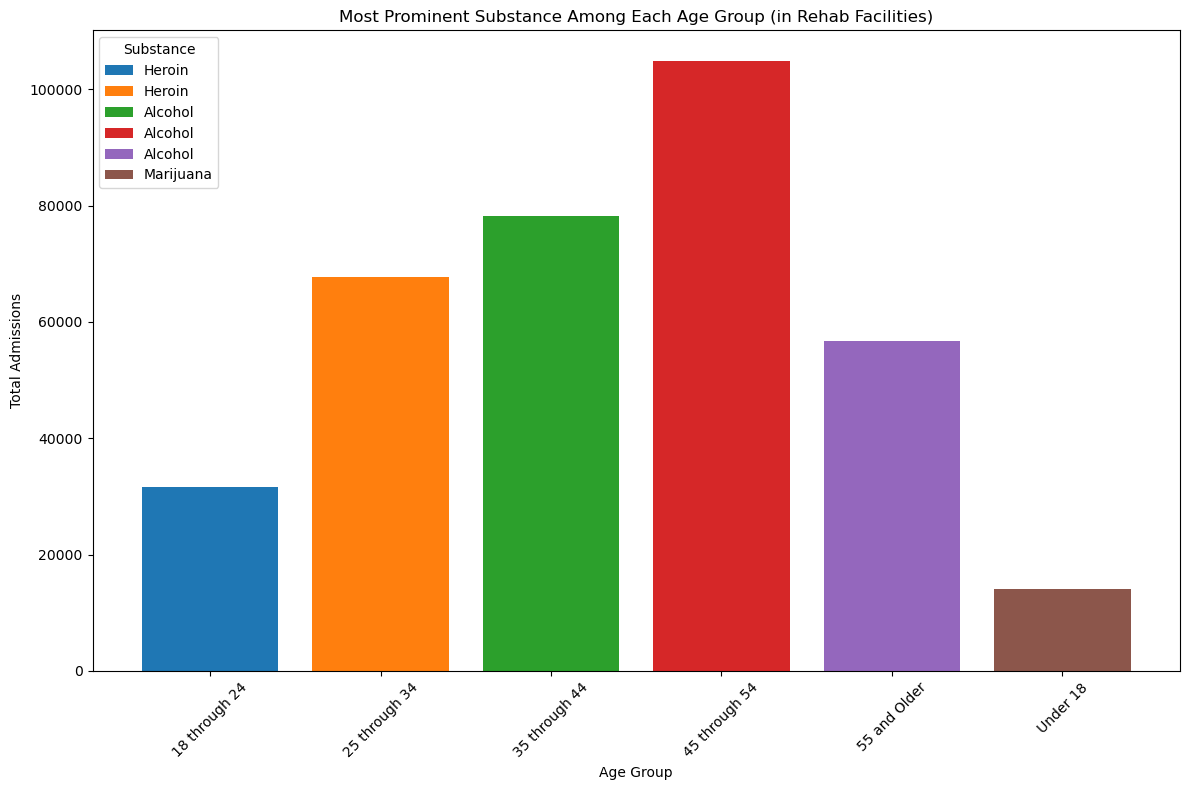

In [242]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Substance_Use_Disorder_Treatment_Program_Admissions__Beginning_2007.csv')

grouped_data = filtered_rehab_data.groupby(['Age Group', 'Primary Substance Group'])['Admissions'].sum().reset_index()

max_admissions = grouped_data.groupby('Age Group')['Admissions'].idxmax()

most_prominent_substances = grouped_data.loc[max_admissions]

plt.figure(figsize=(12, 8))

for age_group in most_prominent_substances['Age Group'].unique():
    age_group_data = most_prominent_substances[most_prominent_substances['Age Group'] == age_group]
    plt.bar(age_group_data['Age Group'], age_group_data['Admissions'], label=age_group_data['Primary Substance Group'])

plt.xlabel('Age Group')
plt.ylabel('Total Admissions')
plt.title('Most Prominent Substance Among Each Age Group (in Rehab Facilities)')
plt.legend(title='Substance', loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


For groups 18-24, the primary substance was heroin, same as for 25 - 34. For age groups 35-44, 45-54, and 55+, it was also alcohol. However, for the group under 18, it was marijuana. This graph represents which substance was most primarily misused amongst admitted cases into the treatment programs. I noticed that alcohol covered 4 groups, whereas marijuana only covered 1 group. Also, the highest group of admissions with alcohol misuse was 45-54. 

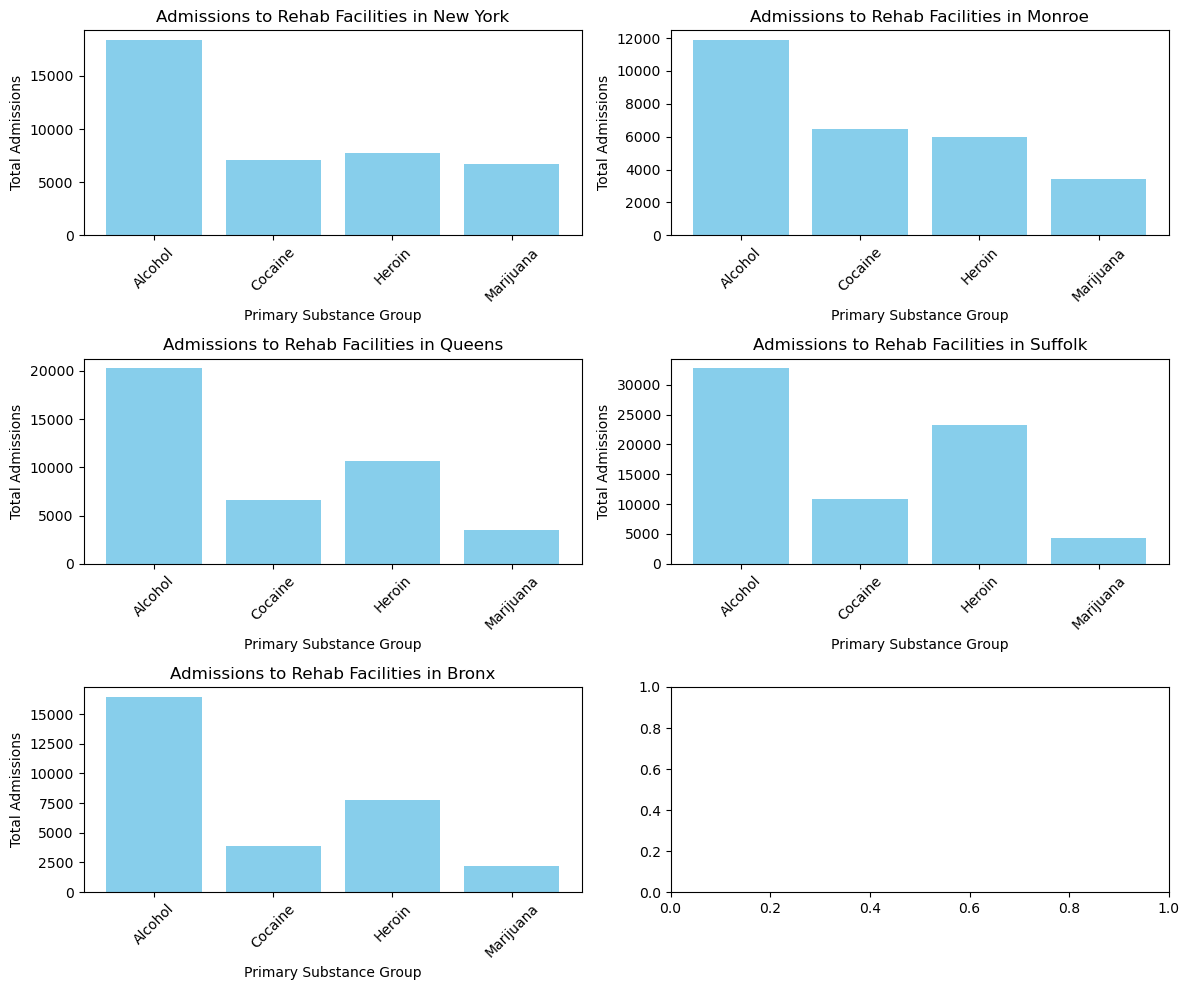

In [216]:
# 7: (10 pts) Using the filtered “rehab” data from question 6 above,
# identify any patterns in the admission to rehab facilities in any 
# 5 counties and substance groups. Explain your observations.

import pandas as pd
import matplotlib.pyplot as plt

counties = ['New York', 'Monroe', 'Queens', 'Suffolk', 'Bronx']
substance_groups = ['Alcohol', 'Heroin', 'Cocaine', 'Marijuana', 'Opiates']

grouped_data = filtered_data.groupby(['County of Program Location', 'Primary Substance Group'])['Admissions'].sum().reset_index()

fig, axs = plt.subplots(3, 2, figsize=(12, 10))

for ax, county in zip(axs.flat, counties):
    county_data = grouped_data[grouped_data['County of Program Location'] == county]
    ax.bar(county_data['Primary Substance Group'], county_data['Admissions'], color='skyblue')
    ax.set_title(f'Admissions to Rehab Facilities in {county}')
    ax.set_xlabel('Primary Substance Group')
    ax.set_ylabel('Total Admissions')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

For this question, I compared admissions to 5 different counties, and which primary substance group was linked to those admissions. I noticed that alcohol was the leading substance group in all 5 of these counties, with marijuana always being the least as well. Alcohol is  significantly higher than other groups in each of these counties as well. 

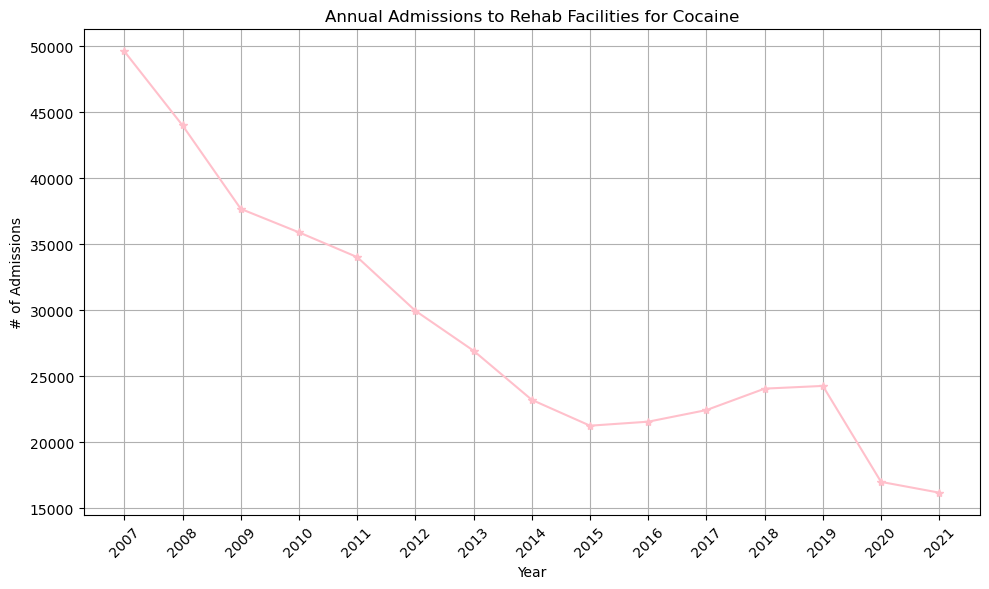

In [223]:
# 8: (5 pts)[optional/bonus] Create any (1) visualization of your choice 
# to demonstrate something interesting about the data. Ensure that you 
# explain what you will demonstrate and the results.

import pandas as pd
import matplotlib.pyplot as plt

cocaine_data = data[data['Primary Substance Group'] == 'Cocaine']

yearly_admissions = cocaine_data.groupby('Year')['Admissions'].sum()

plt.figure(figsize=(10, 6))
plt.plot(yearly_admissions.index, yearly_admissions.values, marker='*', color='pink', linestyle='-')
plt.title('Annual Admissions to Rehab Facilities for Cocaine')
plt.xlabel('Year')
plt.ylabel('# of Admissions')
plt.grid(True)
plt.xticks(yearly_admissions.index, rotation=45)
plt.tight_layout()
plt.show()

For this question, I decided to represent one column in particular to see how that one substance group and its admissions changed over time. 
I'm happy to say that I can see an overall decrease of admissions over the years, with a spike in the years of 2017-2019, but then it goes back down. 

## Question 2: 
TODO: Copy/Paste the instructions for this question.


In [2]:
#Write your python code to answer question 2. You can add new cells below as needed.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
